# Biodiversity Analysis of Endangered Species

#### You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.


# The Scope: Goals and Objectives
### - What types of animal becomes most endangered  
### - What is the obvious relationships between the endangered species and other factors 
### - Is there relationship between different species that becomes endangered 

####  The project will follow as such  
-  Imprort the data 
-  Clean the data if necessary 
-  Exploratory data analysis : includes summary statisitics and visual analysis, Correlation analysis 
-  Conclusion 

In [75]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import chi2_contingency


In [2]:
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

##### The first step will be to understand the data by taking a glimpse of the firts couple rows of the respective data sets

In [3]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [4]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


From the initial observations we can see the consevation status has some missing data, the only numeric status should be the observations, and the rest of the data should be categorical data

### Next lets start with some exploratory data analysis 

#### lets check the data for what each type of column data type is



In [5]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [6]:
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


### next lets check for null values 

In [7]:
species_info[species_info.isnull().any(axis=1)]

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [8]:
print(species_info["conservation_status"].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [9]:
df2= species_info[species_info["conservation_status"].isnull()] 

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5633 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5633 non-null   object
 1   scientific_name      5633 non-null   object
 2   common_names         5633 non-null   object
 3   conservation_status  0 non-null      object
dtypes: object(4)
memory usage: 220.0+ KB


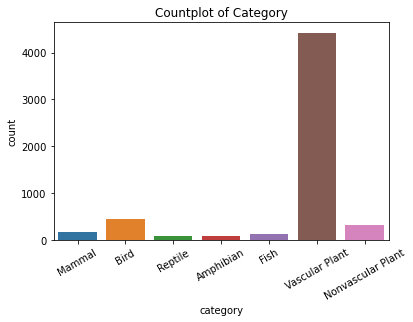

In [11]:
sns.countplot(data=df2, x="category") 
plt.title('Countplot of Category') 
plt.xticks(rotation=30)
plt.show()

##### most of the Null values comes from the vacular plan followed by bird

### lets find the unique values of some of the data 


###### uniqure conservation status, then see if we can rename it to something more useful if null  

In [12]:
species_info.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


In [13]:
species_info['conservation_status'] =  species_info['conservation_status'].fillna("No intervention")

In [14]:
species_info.groupby('conservation_status').scientific_name.nunique()

conservation_status
Endangered              15
In Recovery              4
No intervention       5363
Species of Concern     151
Threatened              10
Name: scientific_name, dtype: int64

### we can visualise the above now in  a bar chart 

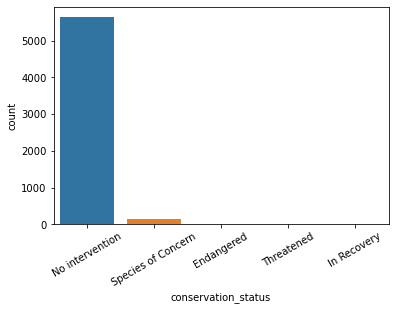

<Figure size 432x288 with 0 Axes>

In [15]:

sns.countplot(data=species_info, x="conservation_status")  
plt.xticks(rotation=30)
plt.show()
plt.clf() 

## we can see most the data shows that for most species there's no intervention in place 

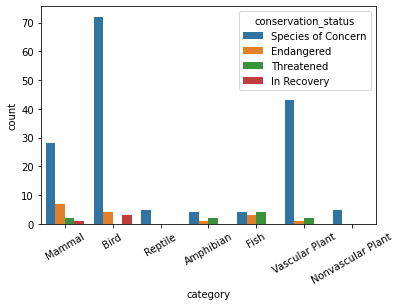

<Figure size 432x288 with 0 Axes>

In [16]:
##lets find out if specific types of animals are more likely to be endangered 
## we can do this by plotting the category of the animal against the endangered 

filtered_species_info = species_info[species_info['conservation_status'] != "No intervention"]
sns.countplot(data=filtered_species_info, x="category", hue="conservation_status")
plt.xticks(rotation=30)
plt.show()
plt.clf() 

##so  based on this intial plot it looks like mammals have the largest number of animals of concern as birds 
##mammal seem to be the most endangered 

In [44]:
## lets try to explore more if any og these animals have the the conservation status of no intervention it 
## would mean they are not protected 
df_unprotected= species_info 
df_unprotected["Protected"]=df_unprotected["conservation_status"]!= "No intervention" 

df_unprotected.head()



,category,scientific_name,common_names,conservation_status,Protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No intervention,False


In [53]:
##lets now see in terms the category how many of the species in each category are protected 

df_unprotectedgrouped = df_unprotected.groupby(["category","Protected"]).scientific_name.nunique().reset_index() 
df_unprotectedgrouped = df_unprotectedgrouped.pivot(columns="Protected", index="category", values="scientific_name").reset_index()
df_unprotectedgrouped.columns = ["category","Not protected","Protected"] 
df_unprotectedgrouped["proportion_unprotected"] = df_unprotectedgrouped["Not protected"]/(df_unprotectedgrouped["Not protected"]+df_unprotectedgrouped["Protected"])
df_unprotectedgrouped["proportion_protected"] = df_unprotectedgrouped["Protected"]/(df_unprotectedgrouped["Not protected"]+df_unprotectedgrouped["Protected"])
df_unprotectedgrouped 

## seems like for example Mammals are more protected than birds, since this is categorical data we can do a chi sqaured test to test the significance



,category,Not protected,Protected,proportion_unprotected,proportion_protected
0,Amphibian,72,7,0.911392,0.088608
1,Bird,413,75,0.846311,0.153689
2,Fish,115,11,0.912698,0.087302
3,Mammal,146,30,0.829545,0.170455
4,Nonvascular Plant,328,5,0.984985,0.015015
5,Reptile,73,5,0.935897,0.064103
6,Vascular Plant,4216,46,0.989207,0.010793


# The steps to do a chi squared test 
## 1. Define your hypothesis: the null hypothesis is that there is no associateion between the two variables 
##    Alternative hypothesis : there is an association between the two variables 

#2. Next we need to build a contingency table (a table showing the distribution of one variable in rows and another in columns, used to study the correlation between the two variables)  

## Lets build the contingency table for mammal and birds


In [81]:
contingency = [[30, 146],
              [75, 413]] 

contingency 

chi2_contingency(contingency) 
chi2, p, dof, expected = chi2_contingency(contingency) 
print(f"Chi-Squared: {chi2}, p-value: {p}, Degrees of Freedom: {dof}") 

## since the p value is greater than 0.05 than the result is not significant hence meaning there's no strong evidence to suggest an 
##assocaiation between the groups so we accept the null hypothesis 



Chi-Squared: 0.1617014831654557, p-value: 0.6875948096661336, Degrees of Freedom: 1


In [82]:
##lets try for Reptiles and amphibians 

contingency = [[30, 146],
              [5, 73]]  

chi2, p, dof, expected = chi2_contingency(contingency) 
print(f"Chi squared:{chi2}, pvalue: {p}, Degrees of freedom:{dof}" ) 

## in this case p value <0.05 therefore we reject the null hypthesis 
## we accept that there is an association between theese two variables
## so certain types of animals based on this are more likely to be endangered  so reptiles are more likely to be endangered

Chi squared:4.289183096203645, pvalue: 0.03835559022969898, Degrees of freedom:1
